<a href="https://colab.research.google.com/github/luizdalla/myfinance/blob/main/04_correlation_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment setup and imports

In [1]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.3 MB/s 


In [2]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Getting Tickers

Dowload csv with daily teoric wallet

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm


In [81]:
df = pd.read_csv('IBOVDia_18-10-22.csv', encoding='latin-1', 
                 skiprows=1, decimal=',', thousands='.',
                 delimiter=';',
                 index_col=None,
                 )
df.columns = ['cod', 'stock', 'type', 'qt', 'part']
df

,cod,stock,type,qt,part
RRRP3,3R PETROLEUM,ON NM,2.004539e+08,0.380,NaN
ALPA4,ALPARGATAS,PN N1,2.027660e+08,0.195,NaN
ABEV3,AMBEV S/A,ON,4.386653e+09,3.057,NaN
AMER3,AMERICANAS,ON NM,5.960863e+08,0.492,NaN
ARZZ3,AREZZO CO,ON NM,6.035803e+07,0.280,NaN
...,...,...,...,...,...
VBBR3,VIBRA,ON NM,1.114443e+09,0.893,NaN
WEGE3,WEG,ON NM,1.481593e+09,2.327,NaN
YDUQ3,YDUQS PART,ON NM,2.960155e+08,0.179,NaN
Quantidade Teórica Total,NaN,NaN,1.005125e+11,100.000,NaN


In [82]:
# Getting only tickers
tickers = df.index[:-2].to_list()

In [83]:
def fix_col_names(df):
  return [col.rstrip('.SA') for col in df.columns]

In [84]:
ibov_tickers = [item + '.SA' for item in tickers]
ibov_tickers[0:5]

['RRRP3.SA', 'ALPA4.SA', 'ABEV3.SA', 'AMER3.SA', 'ARZZ3.SA']

## Getting Stock Prices

In [85]:
prices = yf.download(ibov_tickers, period='1y')['Adj Close']
prices.columns = fix_col_names(prices)

[*********************100%***********************]  92 of 92 completed


In [86]:
prices.head()

,ABEV3,ALPA4,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VBBR3,VIIA3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-18 00:00:00-03:00,15.033301,46.798866,38.300697,86.071877,16.823448,34.360001,12.323631,29.967367,16.169092,19.000120,...,11.876899,35.506546,14.775815,15.065536,73.168800,24.005548,8.18,43.392761,39.673882,26.807281
2021-10-19 00:00:00-03:00,14.571331,45.068138,38.261482,81.505241,16.416748,30.799999,11.942094,28.497377,15.635376,18.412121,...,11.667529,34.108105,13.999654,14.606449,72.326515,22.559198,7.80,42.888302,38.681049,24.981092
2021-10-20 00:00:00-03:00,14.831189,45.285717,38.996716,80.801163,16.595299,30.680000,12.533477,29.027693,16.212837,19.043997,...,11.762698,33.185730,14.191298,14.063040,70.193344,22.578613,7.52,42.972374,39.437962,24.752819
2021-10-21 00:00:00-03:00,14.571331,43.920914,34.722565,77.975136,16.297716,29.690001,12.409475,27.743774,15.749118,18.649076,...,11.401061,32.293110,13.376808,13.266665,68.810905,21.384645,6.92,42.299763,38.681049,23.819874
2021-10-22 00:00:00-03:00,14.436589,43.169281,33.056042,76.361656,15.980292,29.190001,12.037477,26.897133,15.232898,17.946995,...,11.296377,31.618681,12.936025,13.444679,69.653191,20.879879,6.97,41.627155,38.228870,22.480005


In [87]:
prices.tail()

,ABEV3,ALPA4,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VBBR3,VIIA3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-10 00:00:00-03:00,15.20,22.790001,20.680000,101.050003,18.790001,17.389999,14.84,40.070000,16.760000,20.160000,...,12.28,31.440001,12.43,7.65,73.989998,18.020000,3.93,40.209999,34.270000,14.76
2022-10-11 00:00:00-03:00,14.99,22.059999,20.559999,99.849998,19.020000,16.820000,14.35,39.110001,16.600000,20.110001,...,12.22,30.299999,12.46,7.74,73.489998,17.379999,3.78,40.009998,33.900002,14.53
2022-10-13 00:00:00-03:00,15.01,21.719999,19.049999,99.220001,19.469999,16.110001,13.90,39.380001,16.379999,19.820000,...,12.14,30.120001,12.23,7.68,72.180000,17.129999,3.65,39.880001,33.470001,14.26
2022-10-14 00:00:00-03:00,14.83,20.510000,17.440001,98.849998,19.090000,15.550000,13.89,39.160000,16.309999,19.690001,...,11.96,29.799999,12.07,7.39,69.830002,16.680000,3.39,39.389999,32.860001,13.13
2022-10-17 00:00:00-03:00,14.92,20.610001,17.650000,99.250000,19.740000,16.500000,14.15,39.490002,16.430000,19.830000,...,11.93,31.000000,12.43,7.30,70.930000,17.160000,3.48,39.160000,33.610001,12.94


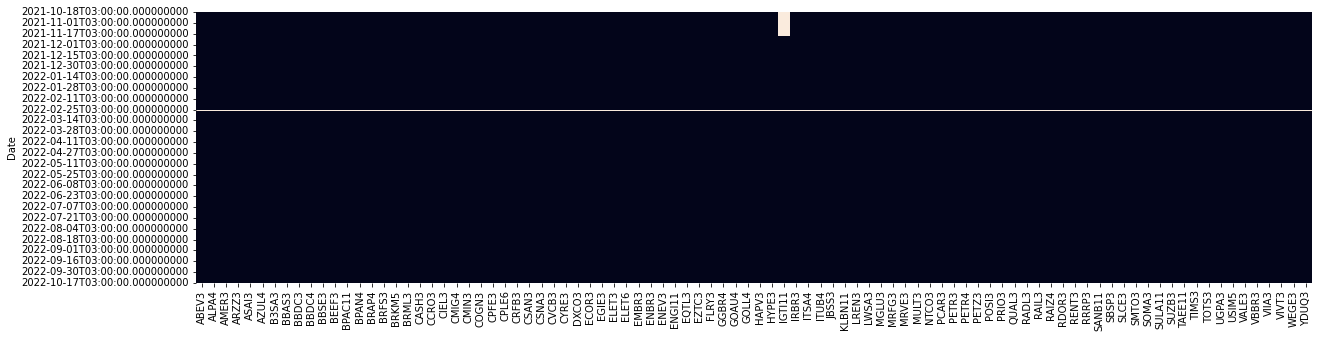

In [88]:
# Checking for nan
plt.figure(figsize=(20,5))
sns.heatmap(prices.isnull(), cbar=False);

In [89]:
# Cleaning nan
prices.dropna(thresh=30,  axis=1, inplace=True)

In [91]:
returns = prices.pct_change().dropna()

In [92]:
returns.tail()

,ABEV3,ALPA4,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VBBR3,VIIA3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-10 00:00:00-03:00,-0.014267,0.012439,-0.019905,-0.008341,0.034692,0.007532,0.002703,-0.014511,-0.009456,-0.015144,...,0.004910,0.007692,0.003228,-0.003906,-0.020130,-0.019586,0.007692,0.004748,0.027586,-0.014686
2022-10-11 00:00:00-03:00,-0.013816,-0.032032,-0.005803,-0.011875,0.012241,-0.032777,-0.033019,-0.023958,-0.009547,-0.002480,...,-0.004886,-0.036260,0.002413,0.011765,-0.006758,-0.035516,-0.038168,-0.004974,-0.010797,-0.015583
2022-10-13 00:00:00-03:00,0.001334,-0.015413,-0.073444,-0.006309,0.023659,-0.042212,-0.031359,0.006904,-0.013253,-0.014421,...,-0.006547,-0.005941,-0.018459,-0.007752,-0.017826,-0.014384,-0.034392,-0.003249,-0.012684,-0.018582
2022-10-14 00:00:00-03:00,-0.011992,-0.055709,-0.084514,-0.003729,-0.019517,-0.034761,-0.000719,-0.005587,-0.004273,-0.006559,...,-0.014827,-0.010624,-0.013083,-0.037760,-0.032557,-0.026270,-0.071233,-0.012287,-0.018225,-0.079243
2022-10-17 00:00:00-03:00,0.006069,0.004876,0.012041,0.004047,0.034049,0.061093,0.018718,0.008427,0.007358,0.007110,...,-0.002508,0.040268,0.029826,-0.012179,0.015753,0.028777,0.026549,-0.005839,0.022824,-0.014471


## Correlation

In [93]:
corr = returns.corr()

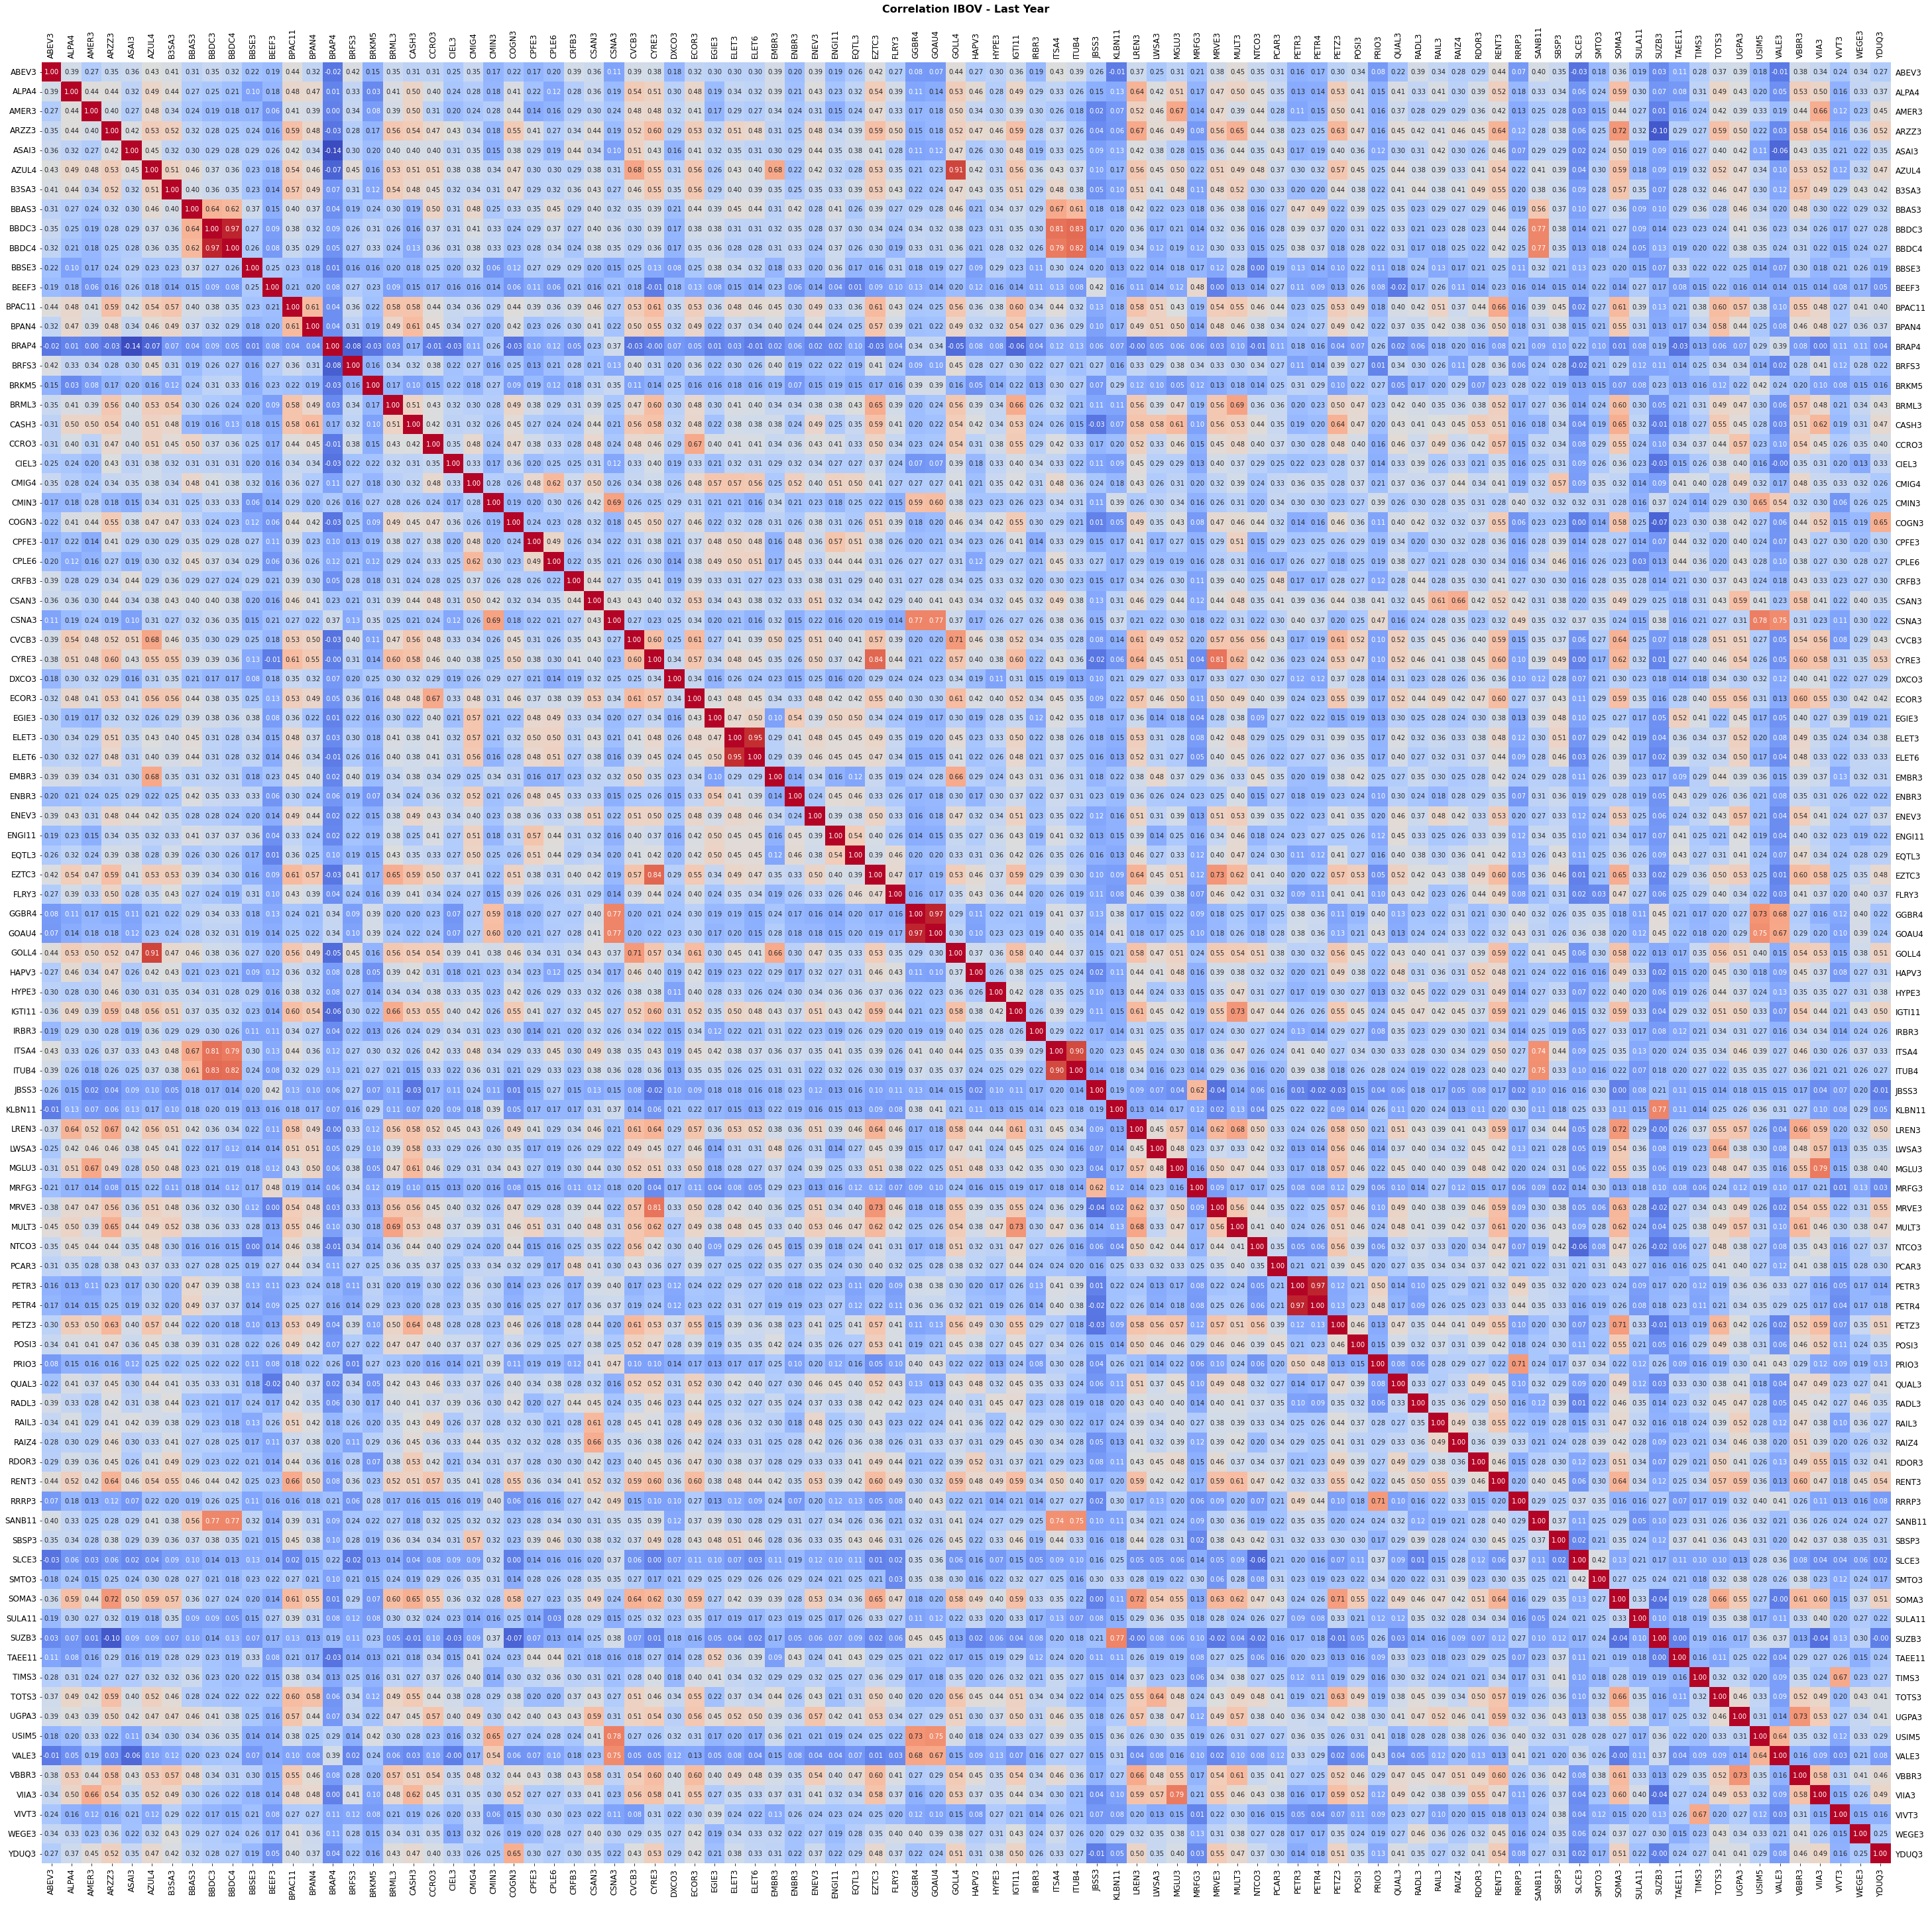

In [94]:
plt.figure(figsize=(50,50))
plt.title('Correlation IBOV - Last Year', fontsize=16, pad=20, fontweight=600)
ax = sns.heatmap(corr, annot=True, cbar=False, cmap='coolwarm', fmt='.2f', )
ax.tick_params(axis = "y", labelright =True, labelrotation=0, labelsize='large')
ax.tick_params(axis = "x", labeltop =True, labelrotation=90, labelsize='large' )

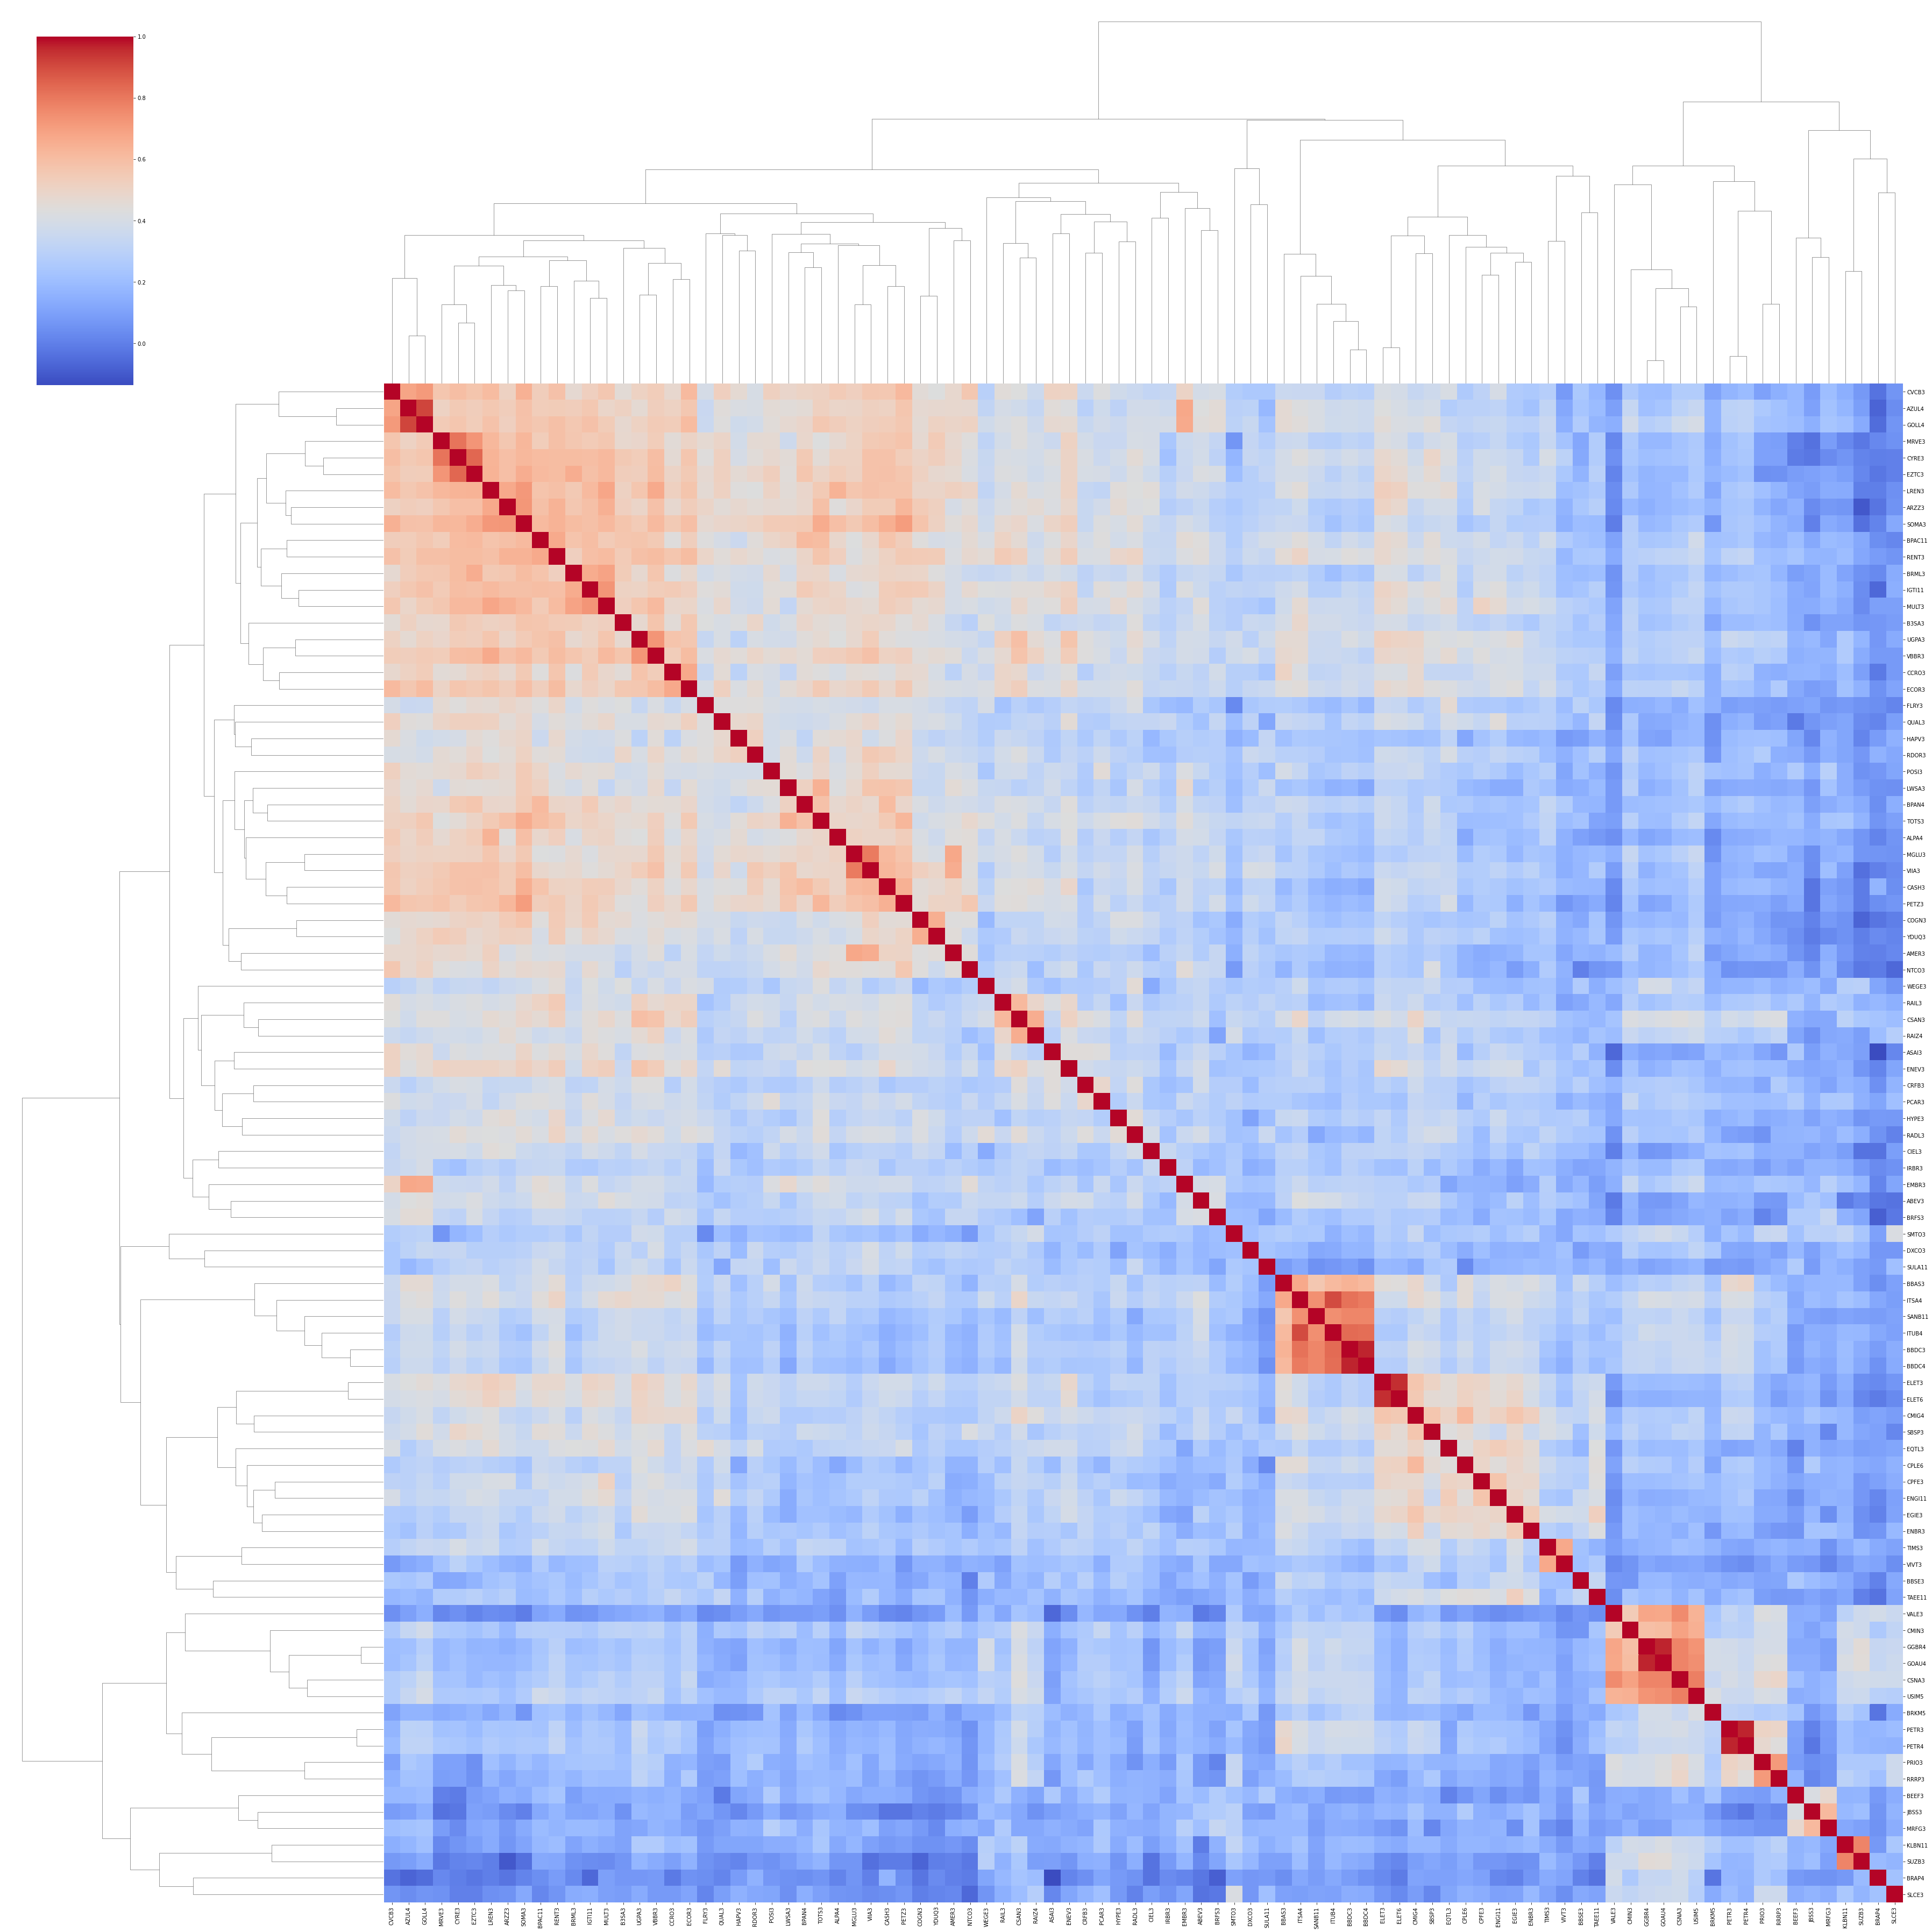

In [95]:
# Clustermap
sns.clustermap(corr, 
               annot=False, 
               cbar=True, 
               cmap='coolwarm',
              figsize=(50,50))

In [98]:
companies = corr.mean().sort_values(ascending=False)

fig  = px.bar(x=companies, y=companies.index, orientation='h', text=round(companies, 2))

fig.layout.title = "Mean Correlation"
fig.layout.xaxis.title = ""
fig.layout.yaxis.title = ""
fig.layout.xaxis.side = 'top'

fig.layout.height = 1400

fig.show()

In [99]:
# list of tickers
tickers

['RRRP3',
 'ALPA4',
 'ABEV3',
 'AMER3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BPAN4',
 'BBSE3',
 'BRML3',
 'BBDC3',
 'BBDC4',
 'BRAP4',
 'BBAS3',
 'BRKM5',
 'BRFS3',
 'BPAC11',
 'CRFB3',
 'CCRO3',
 'CMIG4',
 'CIEL3',
 'COGN3',
 'CPLE6',
 'CSAN3',
 'CPFE3',
 'CMIN3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENGI11',
 'ENEV3',
 'EGIE3',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'NTCO3',
 'SOMA3',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'RENT3',
 'LWSA3',
 'LREN3',
 'MGLU3',
 'MRFG3',
 'CASH3',
 'BEEF3',
 'MRVE3',
 'MULT3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PRIO3',
 'PETZ3',
 'POSI3',
 'QUAL3',
 'RADL3',
 'RAIZ4',
 'RDOR3',
 'RAIL3',
 'SBSP3',
 'SANB11',
 'SMTO3',
 'CSNA3',
 'SLCE3',
 'SULA11',
 'SUZB3',
 'TAEE11',
 'VIVT3',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VIIA3',
 'VBBR3',
 'WEGE3',
 'YDUQ3']